# **Aprendiendo Machine Learning**

In [ ]:
%matplotlib inline
import numpy as np # Trabajar con arreglos ( Vectores y matrices)
import pandas as pd # Lectura de datos (Input/Output)
import matplotlib.pyplot as plt # Graficos en Python
import seaborn as sns # Análisis de correlación

In [ ]:
# Lectura de datos
data2 = pd.read_csv("/content/sample_data/data2.csv")

# **1) ENTENDIMIENTO DEL NEGOCIO**

En base al enunciado, describir en un párrafo cuál es el problema que quiere resolver la empresa o negocio.

**El Supermercado desea realizar una campaña de Marketing Digital y para ello aplicará un modelo de Machine Learning para predecir si un cliente acepta o rechaza dicha campaña.**

# **2) ANÁLISIS EXPLORATORIO DE DATOS**

In [ ]:
# Ver los primeros registros
data2.head(10)

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,1,62.00,3,C,M,405,27,15,NaN,0
1,2,60.00,8,C,F,387,85,5,tc,1
2,3,NaN,7,C,F,366,44,8,tc,1
3,4,47.00,8,S,M,244,244,1,Efectivo,0
4,5,44.00,8,S,F,629,173,4,NaN,1
5,6,0.50,8,S,M,271,40,7,tc,0
6,7,80.00,6,C,M,303,35,9,Efectivo,1
7,8,42.00,4,C,F,215,30,7,Efectivo,0
8,9,0.36,8,D,F,797,236,3,tc,1
9,10,58.00,7,S,M,367,118,3,tc,1


In [ ]:
# Conocer el tipo de dato:
data2.dtypes

CLIENTE               int64
EDAD                float64
ANIOS_AFILIACION      int64
ESTADO_CIVIL         object
SEXO                 object
CPM                   int64
TP                    int64
TXTS                  int64
MEDIO_PAGO           object
TARGET                int64
dtype: object

In [ ]:
# Muestra las dimensiones del dataset
# Número de filas: 500
# Número de columnas: 10
data2.shape

(500, 10)

In [ ]:
# Muestra el número de filas:
data2.shape[0]

500

In [ ]:
# Muestra el número de columnas:
data2.shape[1]

10

**Variables numéricas**

In [ ]:
columnas_numericas = ['EDAD','ANIOS_AFILIACION','CPM','TP','TXTS']

In [ ]:
columnas_numericas

['EDAD', 'ANIOS_AFILIACION', 'CPM', 'TP', 'TXTS']

**Variables categóricas**

In [ ]:
columnas_categoricas = ['ESTADO_CIVIL','SEXO','MEDIO_PAGO']

In [ ]:
columnas_categoricas

['ESTADO_CIVIL', 'SEXO', 'MEDIO_PAGO']

**Medidas estadísticas**

In [ ]:
data2[columnas_numericas].describe()

,EDAD,ANIOS_AFILIACION,CPM,TP,TXTS
count,488.000000,500.000000,500.00000,500.00000,500.000000
mean,49.505061,5.248000,368.68800,82.86400,6.286000
std,15.407085,2.450818,306.92873,68.65307,5.990658
min,0.000000,0.000000,11.00000,6.00000,1.000000
25%,39.000000,3.000000,177.00000,37.00000,3.000000
50%,49.000000,6.000000,275.50000,63.00000,4.000000
75%,60.250000,7.000000,471.25000,105.00000,8.000000
max,90.000000,8.000000,2879.00000,459.00000,54.000000


In [ ]:
data2[columnas_numericas].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EDAD,488.0,49.505061,15.407085,0.0,39.0,49.0,60.25,90.0
ANIOS_AFILIACION,500.0,5.248000,2.450818,0.0,3.0,6.0,7.00,8.0
CPM,500.0,368.688000,306.928730,11.0,177.0,275.5,471.25,2879.0
TP,500.0,82.864000,68.653070,6.0,37.0,63.0,105.00,459.0
TXTS,500.0,6.286000,5.990658,1.0,3.0,4.0,8.00,54.0


**Análisis visual inicial**

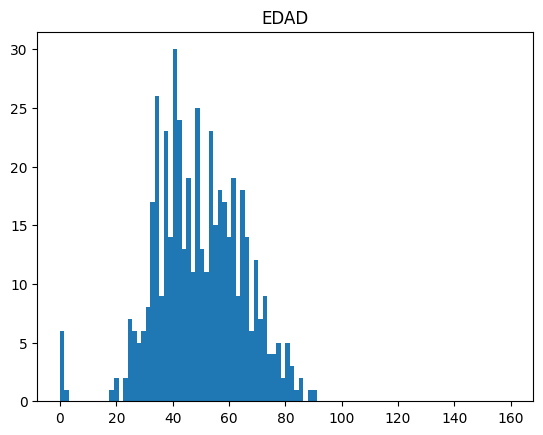

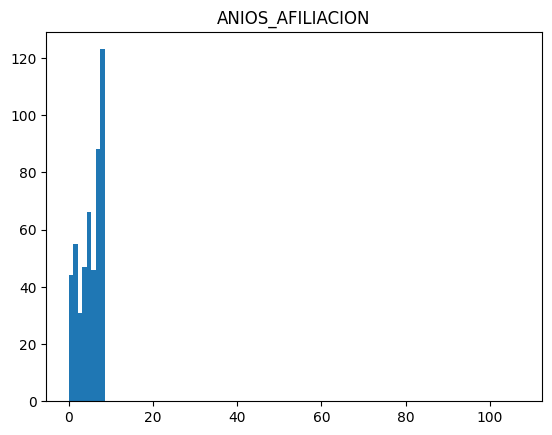

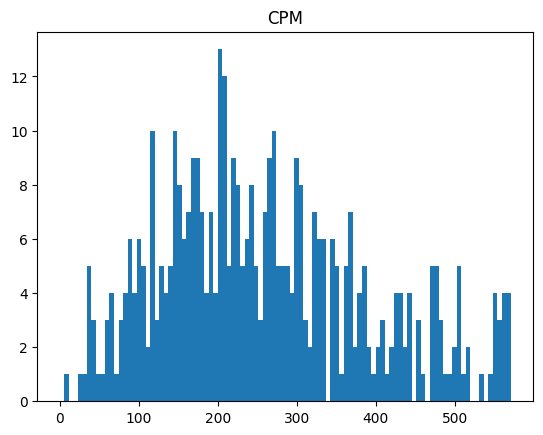

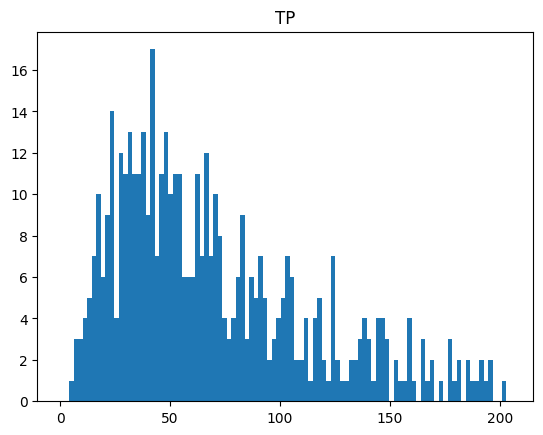

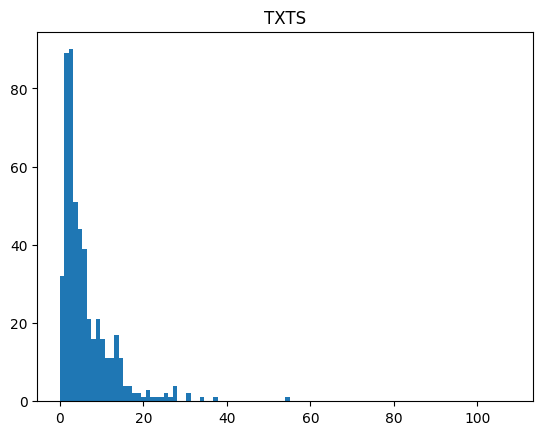

In [ ]:
# Es muy importante analizar las variables numéricas o cuantitativas:
for x in columnas_numericas:
  Q03 = int(data2[x].quantile(0.75))+100
  plt.title(data2[x].name)
  plt.hist(data2[x], bins= 100 ,range=(0,Q03))
  plt.show()

**Análisis de variables numéricas respecto a la variable objetivo**

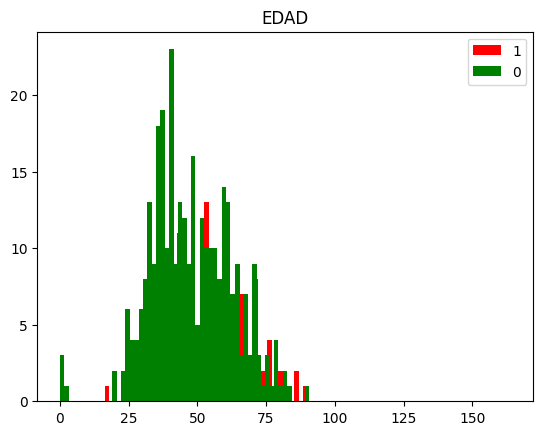

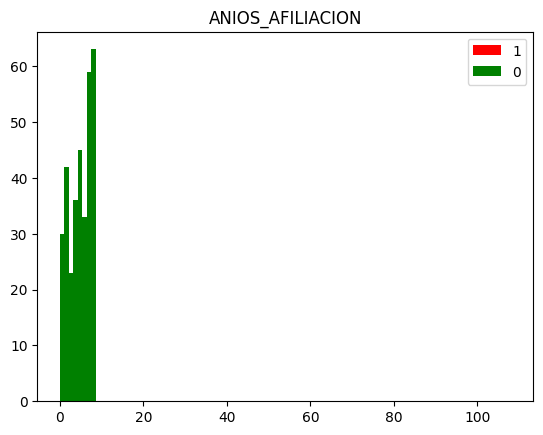

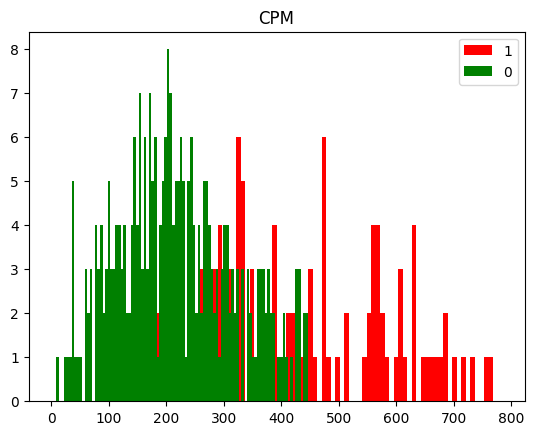

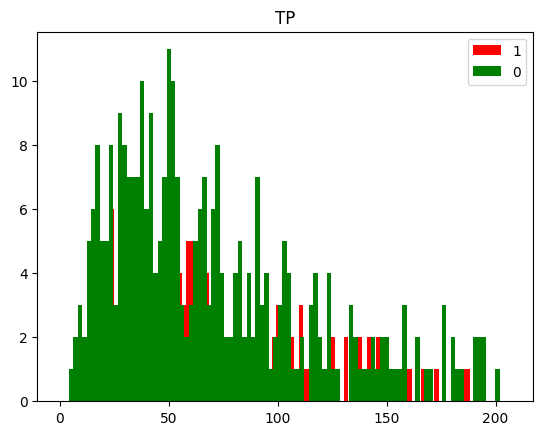

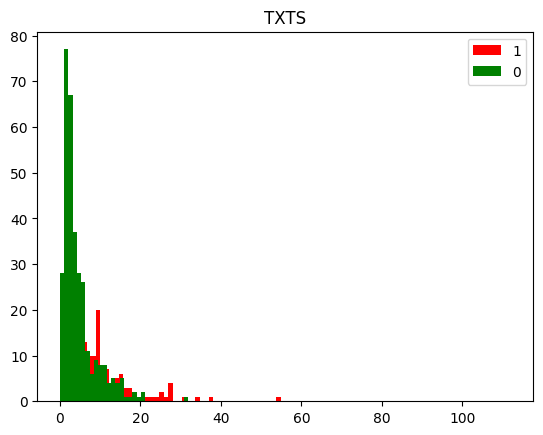

In [ ]:
# Es muy importante analizar las variables numéricas, sobre todo respecto al objetivo:
for x in columnas_numericas:
  # Generamos los subsets de comparación
  x1 = data2.loc[data2.TARGET == 1, x]
  x2 = data2.loc[data2.TARGET == 0, x]
  Q03x1 = int(pd.DataFrame(x1)[x].quantile(0.75))+100
  Q03x2 = int(pd.DataFrame(x2)[x].quantile(0.75))+100

  # Mostramos las densidades:
  plt.title(data2[x].name)
  plt.hist(x1, bins= 100, color='r', range=(0,Q03x1), label= 1)
  plt.hist(x2, bins= 100, color='g', range=(0,Q03x2), label= 0)
  plt.legend()
  plt.show()

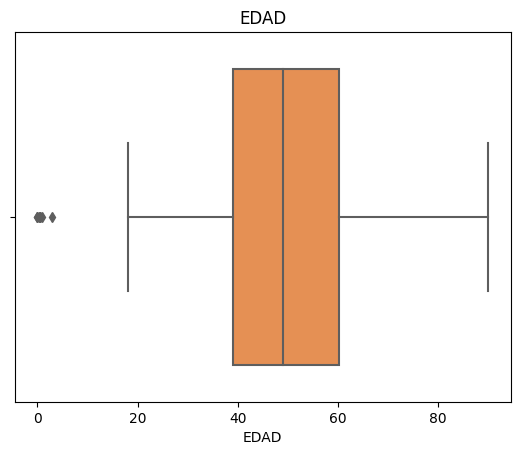

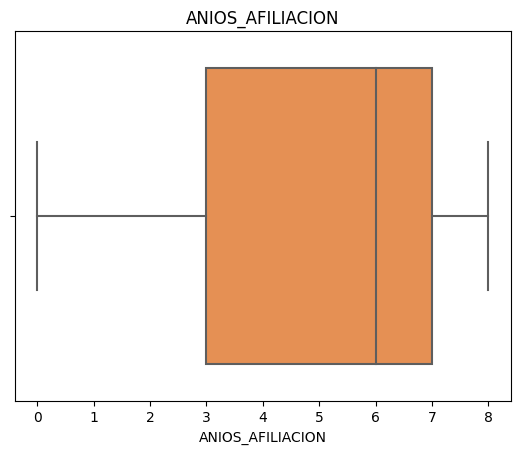

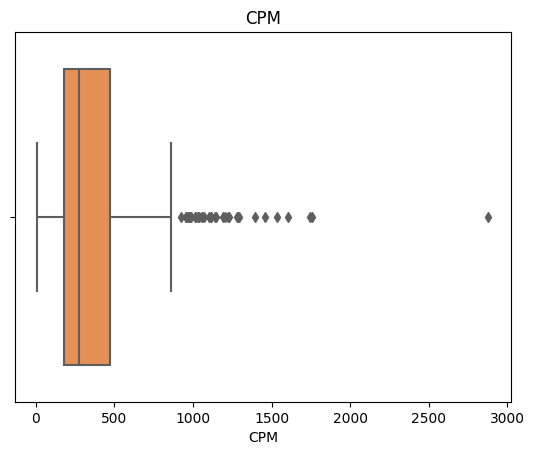

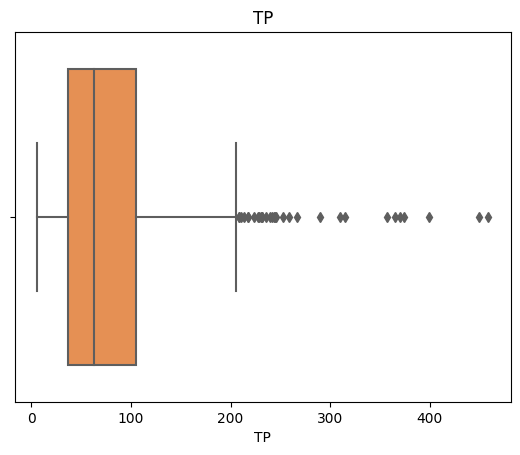

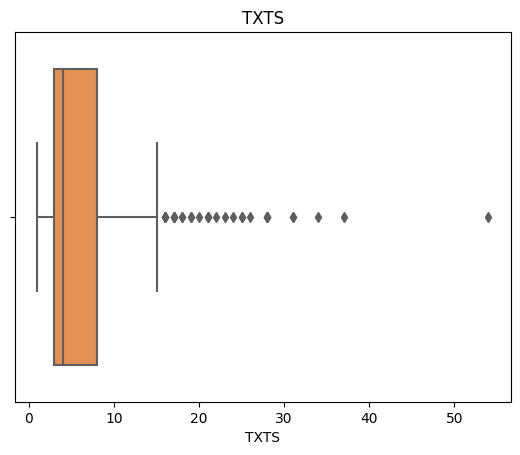

In [ ]:
# El gráfico o diagrama de cajas es muy importante pues nos muestra dispersion, forma y atípicos:
for x in columnas_numericas:
  plt.title(data2[x].name)
  sns.boxplot(x=data2[x], palette="Oranges");
  plt.show()

# **3) LIMPIEZA DE DATOS**

**VARIABLES NUMÉRICAS**

In [ ]:
# Cantidad de campos vacíos por variable numérica:
data2[columnas_numericas].isnull().sum()

EDAD                12
ANIOS_AFILIACION     0
CPM                  0
TP                   0
TXTS                 0
dtype: int64

In [ ]:
# Muestra los clientes con una edad menor a 18 años
data2_c1 = data2[data2["EDAD"]<18]
data2_c1

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
5,6,0.50,8,S,M,271,40,7,tc,0
8,9,0.36,8,D,F,797,236,3,tc,1
16,17,0.61,3,C,M,316,138,2,Efectivo,0
19,20,1.00,7,S,M,470,69,7,tc,0
20,21,3.00,6,C,F,246,123,2,tc,0
24,25,0.00,4,S,F,817,48,17,Efectivo,1
35,36,0.00,8,C,M,424,78,5,tc,1


In [ ]:
# Dimensiones del resultado obtenido:
data2_c1.shape

(7, 10)

In [ ]:
# Muestra los clientes con una edad con campo vacío:
data2_c2 = data2[data2["EDAD"].isnull()]
data2_c2

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
2,3,NaN,7,C,F,366,44,8,tc,1
11,12,NaN,7,C,F,228,60,4,Efectivo,0
39,40,NaN,2,V,F,331,145,2,tc,0
43,44,NaN,2,C,F,61,32,2,tc,0
58,59,NaN,3,S,M,107,45,2,tc,0
60,61,NaN,1,S,F,259,94,3,tc,0
84,85,NaN,8,C,F,333,23,15,tc,1
90,91,NaN,8,S,F,176,17,11,Efectivo,0
91,92,NaN,6,S,F,166,16,11,Efectivo,0
92,93,NaN,2,S,F,610,59,10,Efectivo,1


In [ ]:
# Dimensiones del resultado obtenido:
data2_c2.shape

(12, 10)

In [ ]:
# Muestra los clientes con una edad mayor o igual a 18 años
data2_c3 = data2[data2["EDAD"]>=18]
data2_c3

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,1,62.0,3,C,M,405,27,15,NaN,0
1,2,60.0,8,C,F,387,85,5,tc,1
3,4,47.0,8,S,M,244,244,1,Efectivo,0
4,5,44.0,8,S,F,629,173,4,NaN,1
6,7,80.0,6,C,M,303,35,9,Efectivo,1
...,...,...,...,...,...,...,...,...,...,...
495,496,78.0,7,C,F,156,50,3,Efectivo,0
496,497,53.0,7,C,M,272,136,2,Cualquiera,0
497,498,62.0,0,C,M,193,29,7,tc,0
498,499,37.0,6,S,F,300,218,1,tc,0


In [ ]:
data2_c3.shape

(481, 10)

In [ ]:
data2_c3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CLIENTE,481.0,258.486486,141.318731,1.0,140.0,260.0,380.0,500.0
EDAD,481.0,50.214137,14.342314,18.0,39.0,49.0,61.0,90.0
ANIOS_AFILIACION,481.0,5.243243,2.451420,0.0,3.0,6.0,7.0,8.0
CPM,481.0,368.885655,310.095687,11.0,177.0,275.0,472.0,2879.0
TP,481.0,82.889813,68.843136,6.0,37.0,63.0,105.0,459.0
TXTS,481.0,6.288981,6.041322,1.0,3.0,4.0,8.0,54.0
TARGET,481.0,0.334719,0.472384,0.0,0.0,0.0,1.0,1.0


In [ ]:
# Mediana de las variables numéricas:
data2_c3.median()

<ipython-input-30-2d52d1a8faaa>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2_c3.median()


CLIENTE             260.0
EDAD                 49.0
ANIOS_AFILIACION      6.0
CPM                 275.0
TP                   63.0
TXTS                  4.0
TARGET                0.0
dtype: float64

In [ ]:
# Cálculo de la mediana de la edad:
data2_c3['EDAD'].median()

49.0

**Imputación de edades menores a 18 años**

In [ ]:
# Clientes con una edad menor a 18 años
data2_c1

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
5,6,0.50,8,S,M,271,40,7,tc,0
8,9,0.36,8,D,F,797,236,3,tc,1
16,17,0.61,3,C,M,316,138,2,Efectivo,0
19,20,1.00,7,S,M,470,69,7,tc,0
20,21,3.00,6,C,F,246,123,2,tc,0
24,25,0.00,4,S,F,817,48,17,Efectivo,1
35,36,0.00,8,C,M,424,78,5,tc,1


In [ ]:
# Visualización de solo la variable EDAD:
data2.loc[data2['EDAD'] < 18, 'EDAD']

5     0.50
8     0.36
16    0.61
19    1.00
20    3.00
24    0.00
35    0.00
Name: EDAD, dtype: float64

**Imputando valores erróneos de la variable EDAD con la mediana**

In [ ]:
# Imputando con el valor de la mediana:
data2.loc[data2['EDAD'] < 18, 'EDAD'] = 49

In [ ]:
data2.head(10)

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,1,62.0,3,C,M,405,27,15,NaN,0
1,2,60.0,8,C,F,387,85,5,tc,1
2,3,NaN,7,C,F,366,44,8,tc,1
3,4,47.0,8,S,M,244,244,1,Efectivo,0
4,5,44.0,8,S,F,629,173,4,NaN,1
5,6,49.0,8,S,M,271,40,7,tc,0
6,7,80.0,6,C,M,303,35,9,Efectivo,1
7,8,42.0,4,C,F,215,30,7,Efectivo,0
8,9,49.0,8,D,F,797,236,3,tc,1
9,10,58.0,7,S,M,367,118,3,tc,1


**Imputando los valores nulos en la variable EDAD**

In [ ]:
data2[columnas_numericas].isnull().sum()

EDAD                12
ANIOS_AFILIACION     0
CPM                  0
TP                   0
TXTS                 0
dtype: int64

In [ ]:
data2[columnas_numericas].isnull().sum()/data2.shape[0]*100

EDAD                2.4
ANIOS_AFILIACION    0.0
CPM                 0.0
TP                  0.0
TXTS                0.0
dtype: float64

**Imputación de la variable "EDAD" con la mediana**



In [ ]:
data2['EDAD'] = data2['EDAD'].fillna(data2.EDAD.median())

In [ ]:
data2.head(10)

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,1,62.0,3,C,M,405,27,15,NaN,0
1,2,60.0,8,C,F,387,85,5,tc,1
2,3,49.0,7,C,F,366,44,8,tc,1
3,4,47.0,8,S,M,244,244,1,Efectivo,0
4,5,44.0,8,S,F,629,173,4,NaN,1
5,6,49.0,8,S,M,271,40,7,tc,0
6,7,80.0,6,C,M,303,35,9,Efectivo,1
7,8,42.0,4,C,F,215,30,7,Efectivo,0
8,9,49.0,8,D,F,797,236,3,tc,1
9,10,58.0,7,S,M,367,118,3,tc,1


In [ ]:
# Mostramos las estadísticas principales con los datos de EDAD imputados
data2[['EDAD']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EDAD,500.0,50.168,14.068533,18.0,39.0,49.0,60.0,90.0


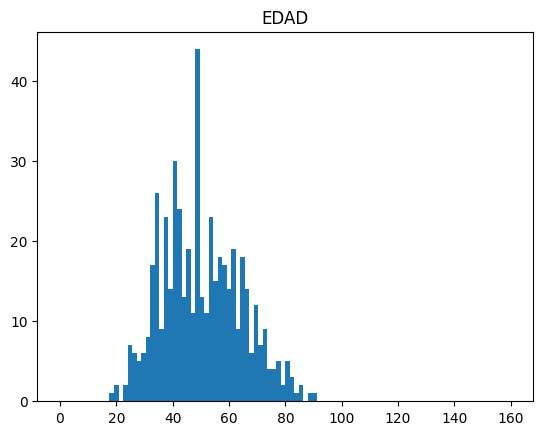

In [ ]:
# Revisamos como la imputacion de alguna manera cambia la distribucion de la variable
for x in ['EDAD']:
  Q03 = int(data2[x].quantile(0.75))+100
  plt.title(data2[x].name)
  plt.hist(data2[x], bins= 100 ,range=(0,Q03))
  plt.show()

**Asimetría y curtosis**

In [ ]:
# Calculamos la asimetria y Kurtosis de las variables
from scipy.stats import kurtosis
from scipy.stats import skew

In [ ]:
# Generalizando las estadísticas
for variable in ['EDAD']:
    print('\n',data2[variable].name,":")
    print('Asimetría: ','\n',round(skew(data2[variable].dropna()),3))
    print('Kurtosis: ','\n',round(kurtosis(data2[variable].dropna()),3))


 EDAD :
Asimetría:  
 0.299
Kurtosis:  
 -0.459


In [ ]:
data2.head()

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,1,62.0,3,C,M,405,27,15,NaN,0
1,2,60.0,8,C,F,387,85,5,tc,1
2,3,49.0,7,C,F,366,44,8,tc,1
3,4,47.0,8,S,M,244,244,1,Efectivo,0
4,5,44.0,8,S,F,629,173,4,NaN,1


In [ ]:
columnas_numericas

['EDAD', 'ANIOS_AFILIACION', 'CPM', 'TP', 'TXTS']

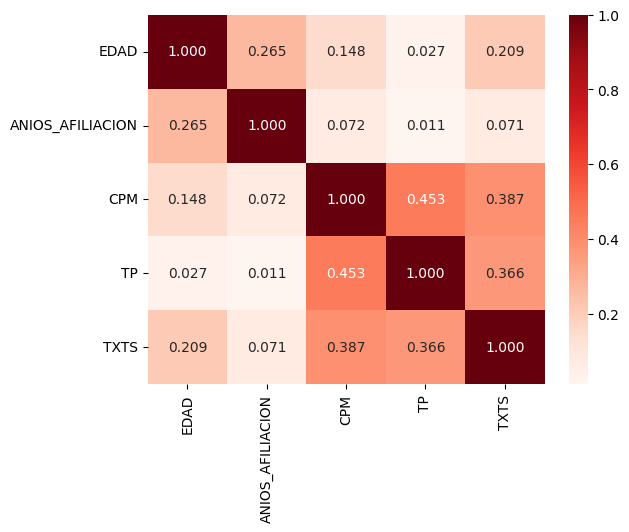

In [ ]:
# Analizamos INICIAL de la correlación de las variables numéricas:
sns.heatmap(abs(data2[columnas_numericas].corr()), annot=True, fmt='.3f', cmap='Reds')
plt.show()

**TRATAMIENTO DE VALORES ATÍPICOS**

In [ ]:
percentiles = list(np.arange(0.1, 0.9, 0.1)) + list(np.arange(0.9, 1.0, 0.01))

In [ ]:
data2.get(columnas_numericas).describe(percentiles = percentiles)

,EDAD,ANIOS_AFILIACION,CPM,TP,TXTS
count,500.000000,500.000000,500.00000,500.00000,500.000000
mean,50.168000,5.248000,368.68800,82.86400,6.286000
std,14.068533,2.450818,306.92873,68.65307,5.990658
min,18.000000,0.000000,11.00000,6.00000,1.000000
10%,33.000000,2.000000,110.90000,23.00000,2.000000
20%,37.000000,3.000000,158.80000,32.00000,2.000000
30%,41.000000,4.000000,200.00000,41.70000,3.000000
40%,45.000000,5.000000,231.00000,50.00000,3.000000
50%,49.000000,6.000000,275.50000,63.00000,4.000000
60%,53.000000,7.000000,329.00000,74.40000,5.000000


**Criterio: Comparando el máximo valor con el percentil 95**

In [ ]:
descriptives = data2.get(columnas_numericas).describe(percentiles = percentiles)
descriptives

,EDAD,ANIOS_AFILIACION,CPM,TP,TXTS
count,500.000000,500.000000,500.00000,500.00000,500.000000
mean,50.168000,5.248000,368.68800,82.86400,6.286000
std,14.068533,2.450818,306.92873,68.65307,5.990658
min,18.000000,0.000000,11.00000,6.00000,1.000000
10%,33.000000,2.000000,110.90000,23.00000,2.000000
20%,37.000000,3.000000,158.80000,32.00000,2.000000
30%,41.000000,4.000000,200.00000,41.70000,3.000000
40%,45.000000,5.000000,231.00000,50.00000,3.000000
50%,49.000000,6.000000,275.50000,63.00000,4.000000
60%,53.000000,7.000000,329.00000,74.40000,5.000000


In [ ]:
descriptives['EDAD']['max'] / descriptives['EDAD']['95%']

1.2

In [ ]:
descriptives['ANIOS_AFILIACION']['max'] / descriptives['ANIOS_AFILIACION']['95%']

1.0

In [ ]:
descriptives['CPM']['max'] / descriptives['CPM']['95%']

2.83827081382166

In [ ]:
descriptives['TP']['max'] / descriptives['TP']['95%']

2.1026110856619358

In [ ]:
descriptives['TXTS']['max'] / descriptives['TXTS']['95%']

3.176470588235294

**Para un ratio mayor o igual a 2 realizar el tratamiento de valores atípicos**

**Variable CPM**

In [ ]:
p95_CPM = np.percentile(data2['CPM'], 95)
p95_CPM

1014.3499999999997

In [ ]:
data2['CPM'] = np.where(data2['CPM'] > p95_CPM, p95_CPM, data2['CPM'])

In [ ]:
# Verificacmos lo realizado:
descriptives1 = data2.get(columnas_numericas).describe(percentiles = percentiles)
descriptives1

,EDAD,ANIOS_AFILIACION,CPM,TP,TXTS
count,500.000000,500.000000,500.000000,500.00000,500.000000
mean,50.168000,5.248000,353.441500,82.86400,6.286000
std,14.068533,2.450818,249.506033,68.65307,5.990658
min,18.000000,0.000000,11.000000,6.00000,1.000000
10%,33.000000,2.000000,110.900000,23.00000,2.000000
20%,37.000000,3.000000,158.800000,32.00000,2.000000
30%,41.000000,4.000000,200.000000,41.70000,3.000000
40%,45.000000,5.000000,231.000000,50.00000,3.000000
50%,49.000000,6.000000,275.500000,63.00000,4.000000
60%,53.000000,7.000000,329.000000,74.40000,5.000000


**Variable TP**

In [ ]:
p95_TP = np.percentile(data2['TP'], 95)
p95_TP

218.29999999999973

In [ ]:
data2['TP'] = np.where(data2['TP'] > p95_TP, p95_TP, data2['TP'])

**Variable TXTS**

In [ ]:
p95_TXTS = np.percentile(data2['TXTS'], 95)
p95_TXTS

17.0

In [ ]:
data2['TXTS'] = np.where(data2['TXTS'] > p95_TXTS, p95_TXTS, data2['TXTS'])

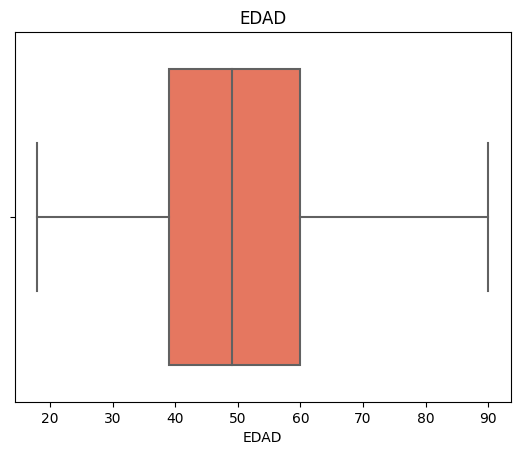

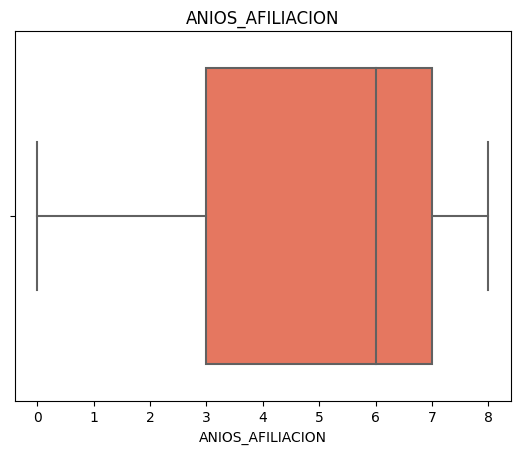

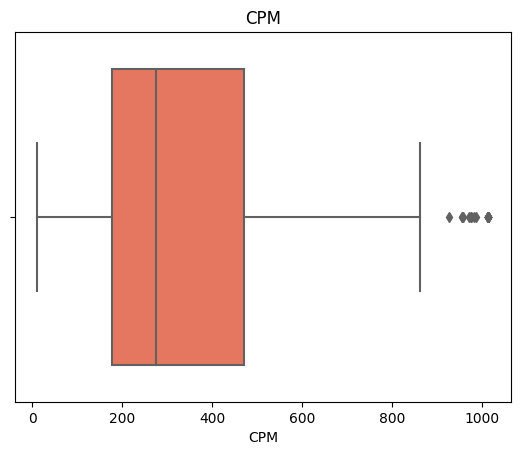

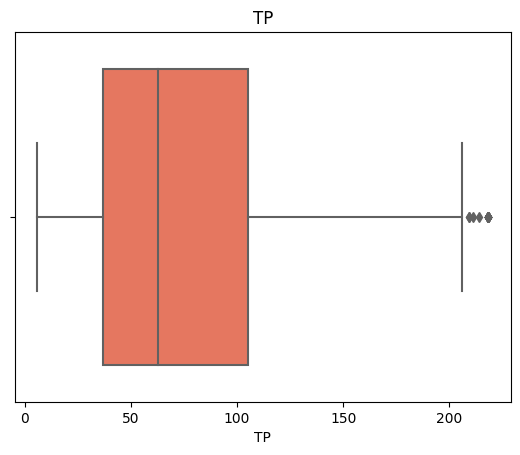

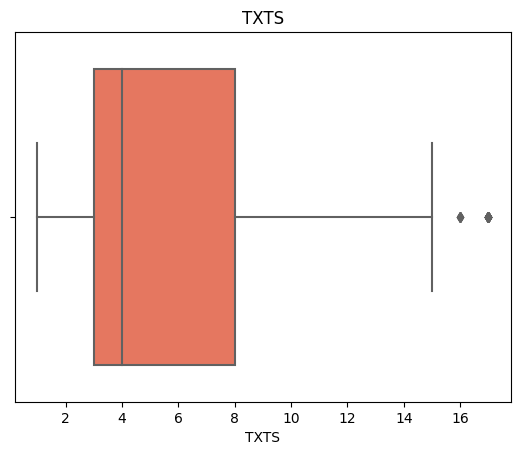

In [ ]:
# El gráfico o diagrama de cajas es muy importante pues nos muestra dispersion, forma y atípicos:
for x in columnas_numericas:
  plt.title(data2[x].name)
  sns.boxplot(x=data2[x], palette="Reds");
  plt.show()

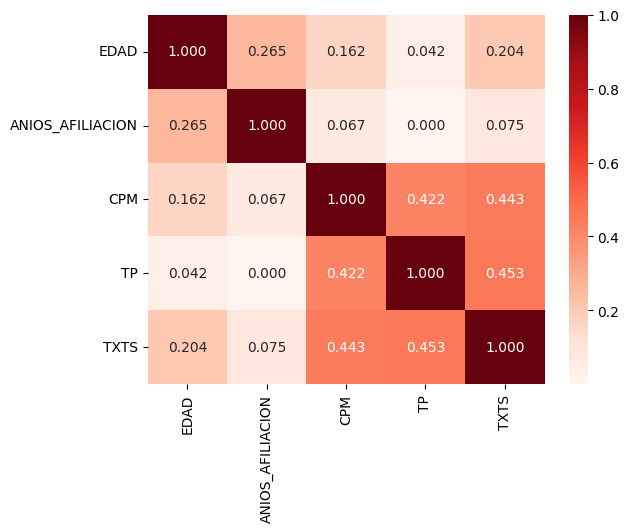

In [ ]:
# Analizamos la correlación de las variables numéricas:
sns.heatmap(abs(data2[columnas_numericas].corr()), annot=True, fmt='.3f', cmap='Reds')
plt.show()

**VARIABLES CATEGÓRICAS**

In [ ]:
data2[columnas_categoricas].isnull().sum()

ESTADO_CIVIL    0
SEXO            0
MEDIO_PAGO      4
dtype: int64

In [ ]:
data2[columnas_categoricas].isnull().sum()/data2.shape[0]*100

ESTADO_CIVIL    0.0
SEXO            0.0
MEDIO_PAGO      0.8
dtype: float64

In [ ]:
# Valores descriptivos:
data2[columnas_categoricas].describe().transpose()

,count,unique,top,freq
ESTADO_CIVIL,500,4,C,292
SEXO,500,2,F,292
MEDIO_PAGO,496,3,tc,257


In [ ]:
data2.head(20)

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,1,62.0,3,C,M,405.00,27.0,15.0,NaN,0
1,2,60.0,8,C,F,387.00,85.0,5.0,tc,1
2,3,49.0,7,C,F,366.00,44.0,8.0,tc,1
3,4,47.0,8,S,M,244.00,218.3,1.0,Efectivo,0
4,5,44.0,8,S,F,629.00,173.0,4.0,NaN,1
5,6,49.0,8,S,M,271.00,40.0,7.0,tc,0
6,7,80.0,6,C,M,303.00,35.0,9.0,Efectivo,1
7,8,42.0,4,C,F,215.00,30.0,7.0,Efectivo,0
8,9,49.0,8,D,F,797.00,218.3,3.0,tc,1
9,10,58.0,7,S,M,367.00,118.0,3.0,tc,1


In [ ]:
# Tipo de datos:
data2[columnas_categoricas].dtypes

ESTADO_CIVIL    object
SEXO            object
MEDIO_PAGO      object
dtype: object

In [ ]:
# Validar registros únicos:
data2[columnas_categoricas].nunique()

ESTADO_CIVIL    4
SEXO            2
MEDIO_PAGO      3
dtype: int64

In [ ]:
# Validando registros únicos:
print(data2.shape)
print(data2[columnas_categoricas].nunique())

(500, 10)
ESTADO_CIVIL    4
SEXO            2
MEDIO_PAGO      3
dtype: int64


In [ ]:
# Mostramos la frecuencia de variables categóricas para encontras hallazgos:
for x in columnas_categoricas:
    print(x)
    print(data2.groupby(x).size())
    print("\n")

ESTADO_CIVIL
ESTADO_CIVIL
C    292
D     16
S    182
V     10
dtype: int64


SEXO
SEXO
F    292
M    208
dtype: int64


MEDIO_PAGO
MEDIO_PAGO
Cualquiera      5
Efectivo      234
tc            257
dtype: int64




**Análisis visual**

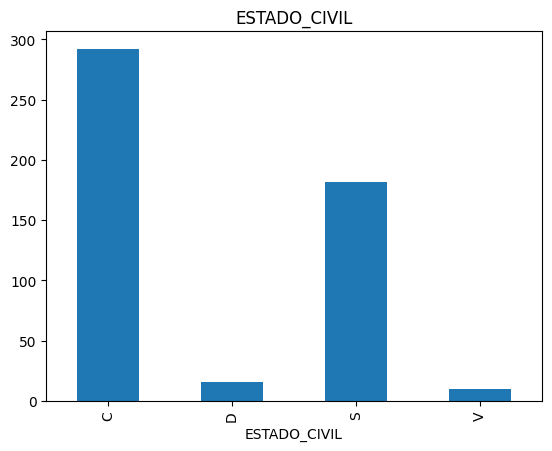

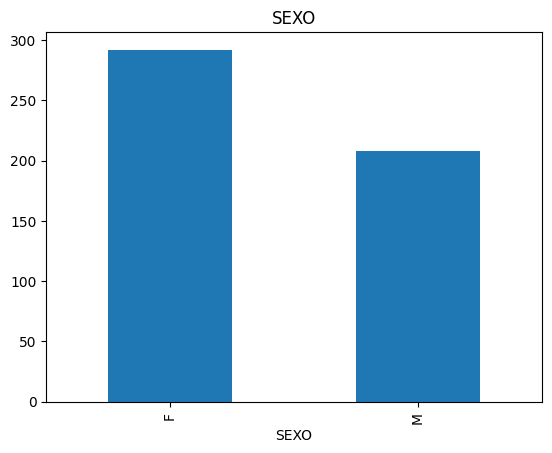

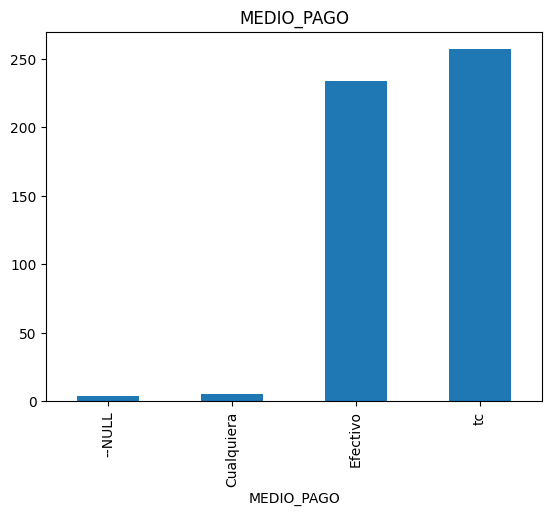

In [ ]:
#Columnas categóricas:
for x in columnas_categoricas:
  plt.title(x)
  data2.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

**Imputando variables categóricas usando la moda**

In [ ]:
# Importando la librería:
from statistics import mode

In [ ]:
mode(data2['MEDIO_PAGO'])

'tc'

In [ ]:
data2['MEDIO_PAGO'] = data2['MEDIO_PAGO'].fillna('tc')

In [ ]:
data2.head(10)

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,1,62.0,3,C,M,405.0,27.0,15.0,tc,0
1,2,60.0,8,C,F,387.0,85.0,5.0,tc,1
2,3,49.0,7,C,F,366.0,44.0,8.0,tc,1
3,4,47.0,8,S,M,244.0,218.3,1.0,Efectivo,0
4,5,44.0,8,S,F,629.0,173.0,4.0,tc,1
5,6,49.0,8,S,M,271.0,40.0,7.0,tc,0
6,7,80.0,6,C,M,303.0,35.0,9.0,Efectivo,1
7,8,42.0,4,C,F,215.0,30.0,7.0,Efectivo,0
8,9,49.0,8,D,F,797.0,218.3,3.0,tc,1
9,10,58.0,7,S,M,367.0,118.0,3.0,tc,1


**Convirtiendo las variables categóricas a numericas:**

In [ ]:
from sklearn.preprocessing import LabelEncoder

for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()
    le.fit(data2[str(c)])
    data2[str(c)]=le.transform(data2[str(c)])

ESTADO_CIVIL
SEXO
MEDIO_PAGO


In [ ]:
# Observar el encoding
data2.head(10)

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,1,62.0,3,0,1,405.0,27.0,15.0,2,0
1,2,60.0,8,0,0,387.0,85.0,5.0,2,1
2,3,49.0,7,0,0,366.0,44.0,8.0,2,1
3,4,47.0,8,2,1,244.0,218.3,1.0,1,0
4,5,44.0,8,2,0,629.0,173.0,4.0,2,1
5,6,49.0,8,2,1,271.0,40.0,7.0,2,0
6,7,80.0,6,0,1,303.0,35.0,9.0,1,1
7,8,42.0,4,0,0,215.0,30.0,7.0,1,0
8,9,49.0,8,1,0,797.0,218.3,3.0,2,1
9,10,58.0,7,2,1,367.0,118.0,3.0,2,1


In [ ]:
data2.dtypes

CLIENTE               int64
EDAD                float64
ANIOS_AFILIACION      int64
ESTADO_CIVIL          int64
SEXO                  int64
CPM                 float64
TP                  float64
TXTS                float64
MEDIO_PAGO            int64
TARGET                int64
dtype: object

# **REGRESIÓN LOGÍSTICA**
- SIN BALANCEO DE DATOS
- INCLUYENDO TODAS LAS VARIABLES

El proceso para usar `scikit-learn` es el siguiente:

1. Separar los datos en matriz de características `features` y variable a predecir `y`
2. Seleccionar el modelo
3. Elegir los hiperparámetros
4. Ajustar o entrenar el modelo (`model.fit`)
5. Predecir con datos nuevos (`model.predict`)

In [ ]:
# Paso 1: Llamamos un modelo analítco
# Llamamos a la libreria de modelos
from sklearn.linear_model import LogisticRegression # Vamos a aplicar la Regresión Logística

In [ ]:
# Paso 2: Definimos el modelo
lr = LogisticRegression() # Utiliza los parámetros por defecto

In [ ]:
# Generamos el frame de drivers o features.
# X1 - y1
drivers1=["EDAD","ANIOS_AFILIACION","ESTADO_CIVIL","SEXO","CPM","TP","TXTS","MEDIO_PAGO"]
X1 = data2[drivers1]

In [ ]:
X1.head(10)

,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO
0,62.0,3,0,1,405.0,27.0,15.0,2
1,60.0,8,0,0,387.0,85.0,5.0,2
2,49.0,7,0,0,366.0,44.0,8.0,2
3,47.0,8,2,1,244.0,218.3,1.0,1
4,44.0,8,2,0,629.0,173.0,4.0,2
5,49.0,8,2,1,271.0,40.0,7.0,2
6,80.0,6,0,1,303.0,35.0,9.0,1
7,42.0,4,0,0,215.0,30.0,7.0,1
8,49.0,8,1,0,797.0,218.3,3.0,2
9,58.0,7,2,1,367.0,118.0,3.0,2


In [ ]:
# Generamos el frame del target o variable objetivo
y1=data2["TARGET"]

In [ ]:
# Paso 3:  Particion muestral
from sklearn.model_selection import train_test_split

In [ ]:
# X1_train, X1_test, Y1_train, Y1_test =
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, # Drivers o covariables
                                                    y1, # Target
                                                    test_size=0.30)

In [ ]:
# Paso 4: Ajusto un modelo predictivo
lr.fit(X1_train, y1_train) # Ajuste o entrenamiento

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Paso 5: Predecimos con el algoritmo entrenado
y1_pred_train = lr.predict(X1_train)
y1_pred_test =  lr.predict(X1_test)

# **VALIDACIÓN**

In [ ]:
# Paso 6: Validamos el mdodelo predictivo
from sklearn import metrics

In [ ]:
# Matriz de confusion
print("Matriz confusion: Train")
cm_train1 = metrics.confusion_matrix(y1_train,y1_pred_train)
print(cm_train1)

print("Matriz confusion: Test")
cm_test1 = metrics.confusion_matrix(y1_test,y1_pred_test)
print(cm_test1)

# Accuracy
print("Accuracy: Train")
accuracy_train1=metrics.accuracy_score(y1_train,y1_pred_train)
print(accuracy_train1)

print("Accuracy: Test")
accuracy_test1=metrics.accuracy_score(y1_test,y1_pred_test)
print(accuracy_test1)

# Precision
print("Precision: Train")
precision_train1=metrics.precision_score(y1_train,y1_pred_train)
print(precision_train1)

print("Precision: Test")
precision_test1=metrics.precision_score(y1_test,y1_pred_test)
print(precision_test1)

# Recall
print("Recall: Train")
recall_train1=metrics.recall_score(y1_train,y1_pred_train)
print(recall_train1)

print("Recall: Test")
recall_test1=metrics.recall_score(y1_test,y1_pred_test)
print(recall_test1)

# F1 Score
print("F1_Score: Train")
f1_score_train1 = metrics.f1_score(y1_train, y1_pred_train)
print(f1_score_train1)

print("F1_Score: Test")
f1_score_test1 =  metrics.f1_score(y1_test, y1_pred_test)
print(f1_score_test1)

Matriz confusion: Train
[[205  22]
 [ 58  65]]
Matriz confusion: Test
[[87 17]
 [20 26]]
Accuracy: Train
0.7714285714285715
Accuracy: Test
0.7533333333333333
Precision: Train
0.7471264367816092
Precision: Test
0.6046511627906976
Recall: Train
0.5284552845528455
Recall: Test
0.5652173913043478
F1_Score: Train
0.6190476190476191
F1_Score: Test
0.5842696629213482


In [ ]:
# Train
accuracy_global_train1 = metrics.accuracy_score(y_true=y1_train, y_pred=y1_pred_train)
precision_global_train1 = metrics.precision_score(y_true=y1_train, y_pred=y1_pred_train)
recall_global_train1 = metrics.recall_score(y_true=y1_train, y_pred=y1_pred_train)
f1_score_global_train1 = metrics.f1_score(y_true=y1_train, y_pred=y1_pred_train)

# Test
accuracy_global_test1 =  metrics.accuracy_score(y_true=y1_test, y_pred=y1_pred_test)
precision_global_test1 =  metrics.precision_score(y_true=y1_test, y_pred=y1_pred_test)
recall_global_test1 =  metrics.recall_score(y_true=y1_test, y_pred=y1_pred_test)
f1_score_global_test1 =  metrics.f1_score(y_true=y1_test, y_pred=y1_pred_test)

Indicadores TRAIN:

In [ ]:
accuracy_global_train1

0.7714285714285715

In [ ]:
precision_global_train1

0.7471264367816092

In [ ]:
recall_global_train1

0.5284552845528455

In [ ]:
f1_score_global_train1

0.6190476190476191

Indicadores TEST:

In [ ]:
accuracy_global_test1

0.7533333333333333

In [ ]:
precision_global_test1

0.6046511627906976

In [ ]:
recall_global_test1

0.5652173913043478

In [ ]:
f1_score_global_test1

0.5842696629213482

**ANEXO: INGENIERÍA DE VARIABLES (SIGNIFICANCIA O IMPORTANCIA)**

In [ ]:
# Podemos para ser ordenados, separar las covariables del target!
x= data2[drivers1] # Conjunto de datos con variables numéricas
y= data2.TARGET # Variable objetivo

In [ ]:
# Selección por Random Forest:
from sklearn.ensemble import RandomForestClassifier # Paso 1: Instancio el algoritmo
forest = RandomForestClassifier()                   # Paso 2: Configuro el algoritmo
forest.fit(x,y)                                     # Paso 3: Ajuste el algoritmo
importances = forest.feature_importances_           # Paso 4: Variables importantes

In [ ]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(x.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
#ImportanciaVariables

In [ ]:
TablaImportancia

,Driver,Importancia
0,EDAD,0.174649
1,ANIOS_AFILIACION,0.097241
2,ESTADO_CIVIL,0.034358
3,SEXO,0.025401
4,CPM,0.305402
5,TP,0.172445
6,TXTS,0.161518
7,MEDIO_PAGO,0.028988


In [ ]:
ImportanciaVariables

,Driver,Importancia
0,CPM,0.305402
1,EDAD,0.174649
2,TP,0.172445
3,TXTS,0.161518
4,ANIOS_AFILIACION,0.097241
5,ESTADO_CIVIL,0.034358
6,MEDIO_PAGO,0.028988
7,SEXO,0.025401


**REGRESIÓN LOGÍSTICA CON DATOS BALANCEADOS**

In [ ]:
# Conteo de clases
count_class_0, count_class_1 = data2.TARGET.value_counts()

In [ ]:
# Dividiendo los sets por clases
data2_class_0 = data2[data2['TARGET'] == 0]
data2_class_1 = data2[data2['TARGET'] == 1]

In [ ]:
print('Cantidades por fila de clase:')
print(data2_class_0.shape)
print(data2_class_1.shape)

In [ ]:
# Otra forma de conteo:
data2['TARGET'].value_counts()

0    331
1    169
Name: TARGET, dtype: int64

**Under Sampling y Over Sumpling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

**Under Sampling**

In [ ]:
rus = RandomUnderSampler()

In [ ]:
X_rus, y_rus = rus.fit_resample(X1, y1)

In [ ]:
X_rus.shape

(338, 8)

In [ ]:
y_rus.shape

(338,)

In [ ]:
y_rus.value_counts()

0    169
1    169
Name: TARGET, dtype: int64

**Over Sampling**

In [ ]:
ros = RandomOverSampler()

In [ ]:
X_ros, y_ros = ros.fit_resample(X1, y1)

In [ ]:
X_ros.shape

(662, 8)

In [ ]:
y_ros.shape

(662,)

In [ ]:
y_ros.value_counts()

0    331
1    331
Name: TARGET, dtype: int64

In [ ]:
X_ros

,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO
0,62.0,3,0,1,405.0,27.0,15.0,2
1,60.0,8,0,0,387.0,85.0,5.0,2
2,49.0,7,0,0,366.0,44.0,8.0,2
3,47.0,8,2,1,244.0,218.3,1.0,1
4,44.0,8,2,0,629.0,173.0,4.0,2
...,...,...,...,...,...,...,...,...
657,70.0,8,2,0,306.0,11.0,17.0,1
658,69.0,8,0,0,515.0,63.0,8.0,2
659,40.0,4,2,1,559.0,168.0,3.0,2
660,33.0,6,2,0,570.0,17.0,17.0,2


**Regresión Logística con datos balanceados**

**Usando Over Sampling**

In [ ]:
lr2 = LogisticRegression() # Utiliza los parámetros por defecto

In [ ]:
X_ros.head()

,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO
0,62.0,3,0,1,405.0,27.0,15.0,2
1,60.0,8,0,0,387.0,85.0,5.0,2
2,49.0,7,0,0,366.0,44.0,8.0,2
3,47.0,8,2,1,244.0,218.3,1.0,1
4,44.0,8,2,0,629.0,173.0,4.0,2


In [ ]:
# X_train, X_test, Y_train, Y_test =
X2_train, X2_test, y2_train, y2_test = train_test_split(X_ros, # Drivers o covariables
                                                    y_ros, # Target
                                                    test_size=0.30)

In [ ]:
# Predecimos con el algoritmo entrenado
y2_pred_train = lr.predict(X2_train)
y2_pred_test =  lr.predict(X2_test)

In [ ]:
# Ajusto un modelo predictivo
lr2.fit(X2_train, y2_train) # Ajuste o entrenamiento

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **VALIDACIÓN**

In [ ]:
# Matriz de confusion
print("Matriz confusion: Train")
cm_train2 = metrics.confusion_matrix(y2_train,y2_pred_train)
print(cm_train2)

print("Matriz confusion: Test")
cm_test2 = metrics.confusion_matrix(y2_test,y2_pred_test)
print(cm_test2)

# Accuracy
print("Accuracy: Train")
accuracy_train2=metrics.accuracy_score(y2_train,y2_pred_train)
print(accuracy_train2)

print("Accuracy: Test")
accuracy_test2=metrics.accuracy_score(y2_test,y2_pred_test)
print(accuracy_test2)

# Precision
print("Precision: Train")
precision_train2=metrics.precision_score(y2_train,y2_pred_train)
print(precision_train2)

print("Precision: Test")
precision_test2=metrics.precision_score(y2_test,y2_pred_test)
print(precision_test2)

# Recall
print("Recall: Train")
recall_train2=metrics.recall_score(y2_train,y2_pred_train)
print(recall_train2)

print("Recall: Test")
recall_test2=metrics.recall_score(y2_test,y2_pred_test)
print(recall_test2)

# F1 Score
print("F1_Score: Train")
f1_score_train2 = metrics.f1_score(y2_train, y2_pred_train)
print(f1_score_train2)

print("F1_Score: Test")
f1_score_test2 =  metrics.f1_score(y2_test, y2_pred_test)
print(f1_score_test2)

Matriz confusion: Train
[[199  22]
 [118 124]]
Matriz confusion: Test
[[93 17]
 [40 49]]
Accuracy: Train
0.6976241900647948
Accuracy: Test
0.7135678391959799
Precision: Train
0.8493150684931506
Precision: Test
0.7424242424242424
Recall: Train
0.512396694214876
Recall: Test
0.550561797752809
F1_Score: Train
0.6391752577319587
F1_Score: Test
0.6322580645161291


**Predicción con datos nuevos**

In [ ]:
# Paso6: Implementamos un modelo predictivo
data2_new = pd.read_csv("/content/sample_data/data2_new.csv")

FileNotFoundError: ignored

In [ ]:
data2_new.head(10)

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO
0,1,62,3,C,M,405,27,15,Efectivo
1,2,60,8,C,F,360,85,4,tc
2,3,50,7,C,F,366,44,8,tc
3,4,47,8,S,F,244,244,1,Efectivo
4,5,37,8,S,F,630,145,4,tc
5,6,29,8,S,F,289,49,7,tc
6,7,76,5,C,M,303,35,9,Efectivo
7,8,45,4,C,F,270,30,7,tc
8,9,36,8,D,F,797,252,4,tc
9,10,61,7,S,M,367,242,3,Efectivo


In [ ]:
columnas_categoricas = ["ESTADO_CIVIL","SEXO","MEDIO_PAGO"]
for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()
    le.fit(data2_new[str(c)])
    data2_new[str(c)]=le.transform(data2_new[str(c)])

ESTADO_CIVIL
SEXO
MEDIO_PAGO


In [ ]:
data2_new.head(10)

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO
0,1,62,3,0,1,405,27,15,0
1,2,60,8,0,0,360,85,4,1
2,3,50,7,0,0,366,44,8,1
3,4,47,8,2,0,244,244,1,0
4,5,37,8,2,0,630,145,4,1
5,6,29,8,2,0,289,49,7,1
6,7,76,5,0,1,303,35,9,0
7,8,45,4,0,0,270,30,7,1
8,9,36,8,1,0,797,252,4,1
9,10,61,7,2,1,367,242,3,0


In [ ]:
data2_new2 = data2_new.drop("CLIENTE",axis=1)

In [ ]:
# Con el modelo entrenado, hacemos la predicción para nuevos clientes
y_prediccion = lr.predict(data2_new2)

In [ ]:
y_prediccion

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0])